In [1]:
import pandas as pd
import numpy as np

# LOAD COMPLAINTS DATA

In [2]:
from google.colab import files
uploaded = files.upload()

Saving complaint.csv to complaint.csv


In [3]:
complaints = pd.read_csv("complaint.csv", index_col=0)

In [4]:
complaints.head()

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
1901626,17-70303,Plainte,Direction - Affaires pénales et criminelles,Adresse,NaN,NaN,NaN,1.0,Ville de Montréal,NaN,NaN,2017-03-07T14:37:01,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION DES AFFAIRES PENALES ET CRIMINELLES,NaN,NaN,NaN,NaN,Refusée,2017-03-08T10:14:58
1901646,18-165551,Plainte,Cour municipale,Adresse,boulevard Saint-Jean,NaN,NaN,NaN,Pointe-Claire,NaN,H9R3J2,2018-05-31T16:46:36,Téléphone,1,0,0,0,0,0,0,0,0,SERVICE DES AFFAIRES JURIDIQUES,NaN,NaN,NaN,NaN,Terminée,2018-06-15T15:34:44
1901662,18-273642,Plainte,Centre de services 311,Adresse,NaN,NaN,NaN,NaN,Ville de Montréal,NaN,NaN,2018-08-25T10:12:08,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,Terminée,2018-08-26T15:36:51
1901665,18-298856,Plainte,Centre de services 311,Adresse,NaN,NaN,NaN,NaN,Ville de Montréal,NaN,NaN,2018-09-15T14:47:29,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,Terminée,2018-09-16T11:09:10
1901682,18-394456,Plainte,Cour municipale,Adresse,NaN,NaN,NaN,NaN,Ville de Montréal,NaN,NaN,2018-12-20T11:02:06,Téléphone,1,0,0,0,0,0,0,0,0,SERVICE DES AFFAIRES JURIDIQUES,NaN,NaN,NaN,NaN,Refusée,2019-01-03T07:28:59


# LOAD WEATHER DATA

In [5]:
from google.colab import files
uploaded = files.upload()

Saving en_climate_daily_QC_7024745_2016_P1D.csv to en_climate_daily_QC_7024745_2016_P1D.csv
Saving en_climate_daily_QC_7024745_2017_P1D.csv to en_climate_daily_QC_7024745_2017_P1D.csv
Saving en_climate_daily_QC_7024745_2018_P1D.csv to en_climate_daily_QC_7024745_2018_P1D.csv
Saving en_climate_daily_QC_7024745_2019_P1D.csv to en_climate_daily_QC_7024745_2019_P1D.csv


In [6]:
weather_2016 = pd.read_csv(r"en_climate_daily_QC_7024745_2016_P1D.csv")
weather_2017 = pd.read_csv(r"en_climate_daily_QC_7024745_2017_P1D.csv")
weather_2018 = pd.read_csv(r"en_climate_daily_QC_7024745_2018_P1D.csv")
weather_2019 = pd.read_csv(r"en_climate_daily_QC_7024745_2019_P1D.csv")

In [7]:
weather_2016.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-73.58,45.5,MCTAVISH,7024745,2016-01-01,2016,1,1,NaN,-0.1,NaN,-3.6,NaN,-1.9,NaN,19.9,NaN,0.0,NaN,NaN,M,NaN,M,0.7,NaN,32.0,NaN,NaN,NaN,<31,NaN
1,-73.58,45.5,MCTAVISH,7024745,2016-01-02,2016,1,2,NaN,0.4,NaN,-4.4,NaN,-2.0,NaN,20.0,NaN,0.0,NaN,NaN,M,NaN,M,1.2,NaN,30.0,NaN,21.0,NaN,32,NaN
2,-73.58,45.5,MCTAVISH,7024745,2016-01-03,2016,1,3,NaN,0.2,NaN,-14.8,NaN,-7.3,NaN,25.3,NaN,0.0,NaN,NaN,M,NaN,M,7.7,NaN,32.0,NaN,1.0,NaN,32,NaN
3,-73.58,45.5,MCTAVISH,7024745,2016-01-04,2016,1,4,NaN,-13.5,NaN,-18.5,NaN,-16.0,NaN,34.0,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,52.0,NaN,1.0,NaN,35,NaN
4,-73.58,45.5,MCTAVISH,7024745,2016-01-05,2016,1,5,NaN,-7.5,NaN,-19.0,NaN,-13.3,NaN,31.3,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,45.0,NaN,NaN,NaN,<31,NaN


In [8]:
weather_2017.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-73.58,45.5,MCTAVISH,7024745,2017-01-01,2017,1,1,NaN,0.3,NaN,-4.2,NaN,-2.0,NaN,20.0,NaN,0.0,NaN,NaN,M,NaN,M,1.7,NaN,36.0,NaN,23.0,NaN,32,NaN
1,-73.58,45.5,MCTAVISH,7024745,2017-01-02,2017,1,2,NaN,3.7,NaN,-5.3,NaN,-0.8,NaN,18.8,NaN,0.0,NaN,NaN,M,NaN,M,0.4,NaN,34.0,NaN,NaN,NaN,<31,NaN
2,-73.58,45.5,MCTAVISH,7024745,2017-01-03,2017,1,3,NaN,0.6,NaN,-5.4,NaN,-2.4,NaN,20.4,NaN,0.0,NaN,NaN,M,NaN,M,10.3,NaN,32.0,NaN,NaN,NaN,<31,NaN
3,-73.58,45.5,MCTAVISH,7024745,2017-01-04,2017,1,4,NaN,2.5,NaN,-4.8,NaN,-1.2,NaN,19.2,NaN,0.0,NaN,NaN,M,NaN,M,13.3,NaN,36.0,NaN,21.0,NaN,44,NaN
4,-73.58,45.5,MCTAVISH,7024745,2017-01-05,2017,1,5,NaN,-4.6,NaN,-10.6,NaN,-7.6,NaN,25.6,NaN,0.0,NaN,NaN,M,NaN,M,0.2,NaN,42.0,NaN,30.0,NaN,46,NaN


In [9]:
weather = weather_2016.append([weather_2017, weather_2018, weather_2019])

In [10]:
len(weather)

1461

In [11]:
len(weather_2016) + len(weather_2017) + len(weather_2018) + len(weather_2019)

1461

In [12]:
weather['Date'] = pd.to_datetime(weather['Date/Time']).dt.date

# JOIN COMPLAINTS AND WEATHER

In [13]:
complaints.head()

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
1901626,17-70303,Plainte,Direction - Affaires pénales et criminelles,Adresse,NaN,NaN,NaN,1.0,Ville de Montréal,NaN,NaN,2017-03-07T14:37:01,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION DES AFFAIRES PENALES ET CRIMINELLES,NaN,NaN,NaN,NaN,Refusée,2017-03-08T10:14:58
1901646,18-165551,Plainte,Cour municipale,Adresse,boulevard Saint-Jean,NaN,NaN,NaN,Pointe-Claire,NaN,H9R3J2,2018-05-31T16:46:36,Téléphone,1,0,0,0,0,0,0,0,0,SERVICE DES AFFAIRES JURIDIQUES,NaN,NaN,NaN,NaN,Terminée,2018-06-15T15:34:44
1901662,18-273642,Plainte,Centre de services 311,Adresse,NaN,NaN,NaN,NaN,Ville de Montréal,NaN,NaN,2018-08-25T10:12:08,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,Terminée,2018-08-26T15:36:51
1901665,18-298856,Plainte,Centre de services 311,Adresse,NaN,NaN,NaN,NaN,Ville de Montréal,NaN,NaN,2018-09-15T14:47:29,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,Terminée,2018-09-16T11:09:10
1901682,18-394456,Plainte,Cour municipale,Adresse,NaN,NaN,NaN,NaN,Ville de Montréal,NaN,NaN,2018-12-20T11:02:06,Téléphone,1,0,0,0,0,0,0,0,0,SERVICE DES AFFAIRES JURIDIQUES,NaN,NaN,NaN,NaN,Refusée,2019-01-03T07:28:59


In [14]:
complaints['Date'] = pd.to_datetime(complaints['DDS_DATE_CREATION']).dt.date

In [15]:
complaints = complaints.loc[complaints['Date'] < pd.to_datetime('2020-1-1').date()]

In [16]:
df = complaints.merge(weather, on='Date')
df.shape

(22096, 61)

In [17]:
complaints.shape, weather.shape

((22096, 30), (1461, 32))

In [18]:
df.head()

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT,Date,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,17-70303,Plainte,Direction - Affaires pénales et criminelles,Adresse,NaN,NaN,NaN,1.0,Ville de Montréal,NaN,NaN,2017-03-07T14:37:01,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION DES AFFAIRES PENALES ET CRIMINELLES,NaN,NaN,NaN,NaN,Refusée,2017-03-08T10:14:58,2017-03-07,-73.58,45.5,MCTAVISH,7024745,2017-03-07,2017,3,7,NaN,6.2,NaN,-2.5,NaN,1.9,NaN,16.1,NaN,0.0,NaN,NaN,M,NaN,M,11.4,NaN,40.0,NaN,NaN,NaN,<31,NaN
1,17-70529,Plainte,Dépôt illégal - Déchets,Adresse,rue Saint-Antoine,NaN,NaN,0.0,Le Sud-Ouest,Le Sud-Ouest,H3J1A3,2017-03-07T16:46:03,Téléphone,2,0,0,0,0,0,0,0,0,SUD-OUEST,-73.573757,45.491353,299035.012767,5.039050e+06,Terminée,2017-05-17T11:43:42,2017-03-07,-73.58,45.5,MCTAVISH,7024745,2017-03-07,2017,3,7,NaN,6.2,NaN,-2.5,NaN,1.9,NaN,16.1,NaN,0.0,NaN,NaN,M,NaN,M,11.4,NaN,40.0,NaN,NaN,NaN,<31,NaN
2,17-70519,Plainte,Nettoyage du domaine public,Adresse,NaN,NaN,NaN,1.0,Ville-Marie,Ville-Marie,NaN,2017-03-07T16:34:21,Téléphone,1,0,0,0,0,0,0,0,0,VILLE-MARIE,-73.558829,45.516697,300203.891868,5.041866e+06,Terminée,2017-06-06T14:55:14,2017-03-07,-73.58,45.5,MCTAVISH,7024745,2017-03-07,2017,3,7,NaN,6.2,NaN,-2.5,NaN,1.9,NaN,16.1,NaN,0.0,NaN,NaN,M,NaN,M,11.4,NaN,40.0,NaN,NaN,NaN,<31,NaN
3,17-70468,Plainte,Collecte de résidus alimentaires,Adresse,avenue Charlemagne,NaN,NaN,0.0,Rosemont - La Petite-Patrie,Rosemont-La Petite-Patrie,H1X2H3,2017-03-07T15:57:41,Courriel,0,1,0,0,0,0,0,0,0,ROSEMONT - LA PETITE-PATRIE,-73.559544,45.554939,300151.136340,5.046116e+06,Terminée,2017-03-09T15:37:17,2017-03-07,-73.58,45.5,MCTAVISH,7024745,2017-03-07,2017,3,7,NaN,6.2,NaN,-2.5,NaN,1.9,NaN,16.1,NaN,0.0,NaN,NaN,M,NaN,M,11.4,NaN,40.0,NaN,NaN,NaN,<31,NaN
4,17-70335,Plainte,Trottoir glissant,Adresse,avenue Monty,NaN,NaN,0.0,Montréal-Nord,Montréal-Nord,H1G3N8,2017-03-07T14:50:35,Courriel,0,1,0,0,0,0,0,0,0,MONTREAL-NORD,-73.616362,45.616868,295725.114883,5.053003e+06,Terminée,2017-03-07T14:55:07,2017-03-07,-73.58,45.5,MCTAVISH,7024745,2017-03-07,2017,3,7,NaN,6.2,NaN,-2.5,NaN,1.9,NaN,16.1,NaN,0.0,NaN,NaN,M,NaN,M,11.4,NaN,40.0,NaN,NaN,NaN,<31,NaN


# EXPLORE OUR DATA

In [19]:
df.describe()

,LOC_ERREUR_GDT,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg)
count,22076.000000,22096.000000,22096.000000,22096.000000,22096.000000,22096.000000,22096.000000,22096.000000,22096.000000,22096.000000,22075.000000,22075.000000,22075.000000,2.207500e+04,2.209600e+04,22096.0,22096.0,22096.000000,22096.000000,22096.000000,0.0,21512.000000,21960.000000,21512.000000,21512.000000,21512.000000,0.0,0.0,21345.000000,9581.000000,6215.000000
mean,0.037597,0.976557,0.080014,0.127534,0.001810,0.000045,0.000453,0.000045,0.000045,0.000045,-73.617962,45.532284,295584.347401,5.043606e+06,-7.358000e+01,45.5,7024745.0,2017.674013,6.062500,15.569696,NaN,11.472829,3.349695,7.364220,11.838848,1.203068,NaN,NaN,3.246648,47.838326,18.819469
std,0.190225,0.758742,0.320283,0.391850,0.045592,0.006727,0.023300,0.006727,0.006727,0.006727,0.080200,0.054332,6268.998186,6.033800e+03,1.465172e-11,0.0,0.0,1.093148,3.490346,8.438612,NaN,12.963620,12.079334,12.448411,10.995313,2.361952,NaN,NaN,7.362306,30.028964,11.729102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.940076,45.415286,270394.001965,5.030602e+06,-7.358000e+01,45.5,7024745.0,2016.000000,1.000000,1.000000,NaN,-20.500000,-25.600000,-23.100000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.639700,45.491529,293888.267743,5.039084e+06,-7.358000e+01,45.5,7024745.0,2017.000000,3.000000,9.000000,NaN,0.600000,-7.400000,-3.300000,0.000000,0.000000,NaN,NaN,0.000000,19.000000,4.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.602600,45.531689,296780.334755,5.043543e+06,-7.358000e+01,45.5,7024745.0,2018.000000,6.000000,15.000000,NaN,11.000000,4.300000,7.800000,10.200000,0.000000,NaN,NaN,0.200000,53.000000,21.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.569464,45.563146,299374.268421,5.047036e+06,-7.358000e+01,45.5,7024745.0,2019.000000,9.000000,23.000000,NaN,23.800000,14.200000,18.900000,21.300000,0.900000,NaN,NaN,2.800000,69.000000,27.000000
max,1.000000,23.000000,12.000000,7.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,-73.480537,45.700637,306315.658943,5.062306e+06,-7.358000e+01,45.5,7024745.0,2019.000000,12.000000,31.000000,NaN,36.600000,25.000000,30.000000,41.100000,12.000000,NaN,NaN,77.800000,99.000000,36.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22096 entries, 0 to 22095
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_UNIQUE                  22096 non-null  object 
 1   NATURE                     22096 non-null  object 
 2   ACTI_NOM                   22096 non-null  object 
 3   TYPE_LIEU_INTERV           22096 non-null  object 
 4   RUE                        18967 non-null  object 
 5   RUE_INTERSECTION1          3726 non-null   object 
 6   RUE_INTERSECTION2          3726 non-null   object 
 7   LOC_ERREUR_GDT             22076 non-null  float64
 8   ARRONDISSEMENT             22096 non-null  object 
 9   ARRONDISSEMENT_GEO         22075 non-null  object 
 10  LIN_CODE_POSTAL            16728 non-null  object 
 11  DDS_DATE_CREATION          22096 non-null  object 
 12  PROVENANCE_ORIGINALE       22096 non-null  object 
 13  PROVENANCE_TELEPHONE       22096 non-null  int

# CALCULATE NUMBER OF COMPLAINTS PER DAY

In [21]:
call_counts = df.groupby('Date')[['ID_UNIQUE']].count()

In [22]:
call_counts.head()

,ID_UNIQUE
Date,
2016-01-01,3
2016-01-02,8
2016-01-03,10
2016-01-04,21
2016-01-05,33


# JOIN DAILY CALL COUNTS WITH WEATHER

In [23]:
weather = weather.set_index(['Date'])

In [24]:
calls_and_weather = call_counts.join(weather)

In [25]:
calls_and_weather.head()

,ID_UNIQUE,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,3,-73.58,45.5,MCTAVISH,7024745,2016-01-01,2016,1,1,NaN,-0.1,NaN,-3.6,NaN,-1.9,NaN,19.9,NaN,0.0,NaN,NaN,M,NaN,M,0.7,NaN,32.0,NaN,NaN,NaN,<31,NaN
2016-01-02,8,-73.58,45.5,MCTAVISH,7024745,2016-01-02,2016,1,2,NaN,0.4,NaN,-4.4,NaN,-2.0,NaN,20.0,NaN,0.0,NaN,NaN,M,NaN,M,1.2,NaN,30.0,NaN,21.0,NaN,32,NaN
2016-01-03,10,-73.58,45.5,MCTAVISH,7024745,2016-01-03,2016,1,3,NaN,0.2,NaN,-14.8,NaN,-7.3,NaN,25.3,NaN,0.0,NaN,NaN,M,NaN,M,7.7,NaN,32.0,NaN,1.0,NaN,32,NaN
2016-01-04,21,-73.58,45.5,MCTAVISH,7024745,2016-01-04,2016,1,4,NaN,-13.5,NaN,-18.5,NaN,-16.0,NaN,34.0,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,52.0,NaN,1.0,NaN,35,NaN
2016-01-05,33,-73.58,45.5,MCTAVISH,7024745,2016-01-05,2016,1,5,NaN,-7.5,NaN,-19.0,NaN,-13.3,NaN,31.3,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,45.0,NaN,NaN,NaN,<31,NaN


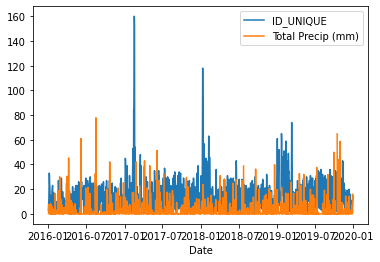

In [26]:
calls_and_weather[['ID_UNIQUE', 'Total Precip (mm)']].plot()

# INVESTIGATE CORRELATIONS

In [27]:
calls_and_weather[['ID_UNIQUE', 'Total Precip (mm)', 'Mean Temp (°C)', 'Month']].corr()

,ID_UNIQUE,Total Precip (mm),Mean Temp (°C),Month
ID_UNIQUE,1.000000,-0.000743,-0.053919,-0.159005
Total Precip (mm),-0.000743,1.000000,-0.000810,0.002009
Mean Temp (°C),-0.053919,-0.000810,1.000000,0.254251
Month,-0.159005,0.002009,0.254251,1.000000


In [28]:
calls_and_weather.index = pd.to_datetime(calls_and_weather.index)

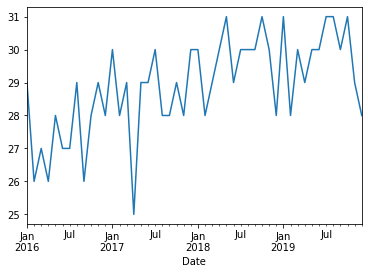

In [29]:
calls_and_weather.resample('M').count()['ID_UNIQUE'].plot()

# RESAMPLE COMPLAINTS TRENDS

In [30]:
complaints['DATE_DERNIER_STATUT'] = pd.to_datetime(complaints['DATE_DERNIER_STATUT'])
complaints = complaints.set_index(['DATE_DERNIER_STATUT'], drop=True)

In [31]:
complaints_resampled = complaints[['PROVENANCE_COURRIEL',
 'PROVENANCE_COURRIER',
 'PROVENANCE_INSTANCE',
 'PROVENANCE_MEDIASOCIAUX',
 'PROVENANCE_MOBILE',
 'PROVENANCE_ORIGINALE',
 'PROVENANCE_PERSONNE',
 'PROVENANCE_SITEINTERNET',
 'PROVENANCE_TELECOPIEUR',
 'PROVENANCE_TELEPHONE']].resample('M').sum()

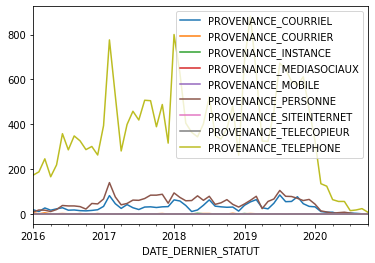

In [32]:
complaints_resampled.plot()

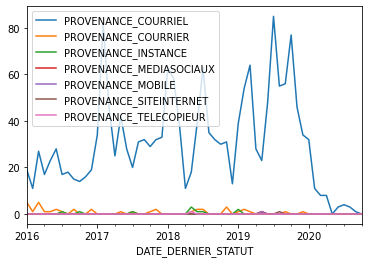

In [33]:
complaints_resampled[['PROVENANCE_COURRIEL',
 'PROVENANCE_COURRIER',
 'PROVENANCE_INSTANCE',
 'PROVENANCE_MEDIASOCIAUX',
 'PROVENANCE_MOBILE',
 'PROVENANCE_SITEINTERNET',
 'PROVENANCE_TELECOPIEUR']].plot()

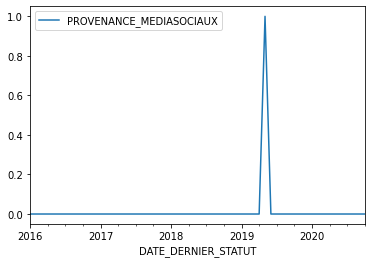

In [34]:
complaints_resampled[['PROVENANCE_MEDIASOCIAUX']].plot()

# PERFORM A REGRESSION

Let's predict how many complaints we will receive in a given day

In [35]:
calls_and_weather.head()

,ID_UNIQUE,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,3,-73.58,45.5,MCTAVISH,7024745,2016-01-01,2016,1,1,NaN,-0.1,NaN,-3.6,NaN,-1.9,NaN,19.9,NaN,0.0,NaN,NaN,M,NaN,M,0.7,NaN,32.0,NaN,NaN,NaN,<31,NaN
2016-01-02,8,-73.58,45.5,MCTAVISH,7024745,2016-01-02,2016,1,2,NaN,0.4,NaN,-4.4,NaN,-2.0,NaN,20.0,NaN,0.0,NaN,NaN,M,NaN,M,1.2,NaN,30.0,NaN,21.0,NaN,32,NaN
2016-01-03,10,-73.58,45.5,MCTAVISH,7024745,2016-01-03,2016,1,3,NaN,0.2,NaN,-14.8,NaN,-7.3,NaN,25.3,NaN,0.0,NaN,NaN,M,NaN,M,7.7,NaN,32.0,NaN,1.0,NaN,32,NaN
2016-01-04,21,-73.58,45.5,MCTAVISH,7024745,2016-01-04,2016,1,4,NaN,-13.5,NaN,-18.5,NaN,-16.0,NaN,34.0,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,52.0,NaN,1.0,NaN,35,NaN
2016-01-05,33,-73.58,45.5,MCTAVISH,7024745,2016-01-05,2016,1,5,NaN,-7.5,NaN,-19.0,NaN,-13.3,NaN,31.3,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,45.0,NaN,NaN,NaN,<31,NaN


In [36]:
features = ['ID_UNIQUE', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)']

In [37]:
X = calls_and_weather[features].copy()

In [38]:
X.head()

,ID_UNIQUE,Month,Day,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h)
Date,,,,,,,,
2016-01-01,3,1,1,-0.1,-3.6,0.7,32.0,<31
2016-01-02,8,1,2,0.4,-4.4,1.2,30.0,32
2016-01-03,10,1,3,0.2,-14.8,7.7,32.0,32
2016-01-04,21,1,4,-13.5,-18.5,0.0,52.0,35
2016-01-05,33,1,5,-7.5,-19.0,0.0,45.0,<31


# CLEAN FEATURES

In [39]:
X['Spd of Max Gust (km/h)'] = X['Spd of Max Gust (km/h)'].apply(lambda x: float(str(x).replace('<', '')))

In [40]:
X.head()

,ID_UNIQUE,Month,Day,Max Temp (°C),Min Temp (°C),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h)
Date,,,,,,,,
2016-01-01,3,1,1,-0.1,-3.6,0.7,32.0,31.0
2016-01-02,8,1,2,0.4,-4.4,1.2,30.0,32.0
2016-01-03,10,1,3,0.2,-14.8,7.7,32.0,32.0
2016-01-04,21,1,4,-13.5,-18.5,0.0,52.0,35.0
2016-01-05,33,1,5,-7.5,-19.0,0.0,45.0,31.0


# HANDLE NaN VALUES

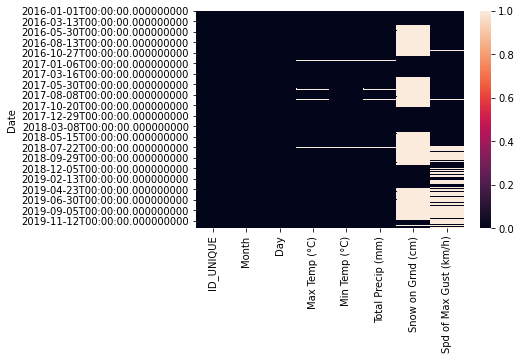

In [41]:
import seaborn as sns

sns.heatmap(X.isna())

In [42]:
X[['Snow on Grnd (cm)', 'Spd of Max Gust (km/h)']] = X[['Snow on Grnd (cm)', 'Spd of Max Gust (km/h)']].fillna(0)

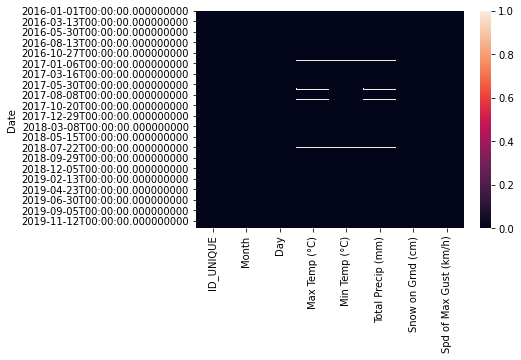

In [43]:
sns.heatmap(X.isna())

In [44]:
X = X.dropna()

# SPLIT THE DATA

In [45]:
y = X[features[0]]
X = X[features[1:]]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# TRAIN YOUR REGRESSOR

In [47]:
from sklearn.linear_model import Ridge

In [48]:
model = Ridge()

model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# EVALUATE PERFORMANCE

In [49]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae} Calls')

Mean Absolute Error: 8.866059140223566 Calls


In [50]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted')

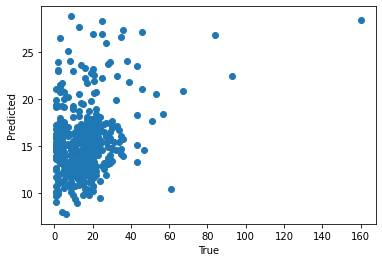

In [51]:
plt.scatter(y_test, predictions)
plt.xlabel("True")
plt.ylabel("Predicted")

# TRY GRADIENT BOOSTING

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

gb_predictions = gb.predict(X_test)

mae = mean_absolute_error(y_test, gb_predictions)
print(f'Mean Absolute Error: {mae} Calls')

Mean Absolute Error: 7.993472250389217 Calls


Text(0, 0.5, 'Predicted')

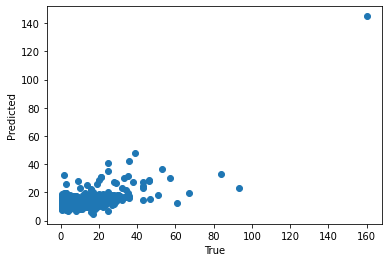

In [53]:
plt.scatter(y_test, gb_predictions)
plt.xlabel("True")
plt.ylabel("Predicted")